## Part 1

In [16]:
import torch as t

In [4]:
x = t.Tensor([5, 3])
y = t.Tensor([2, 1])

In [5]:
x*y

tensor([10.,  3.])

In [7]:
x = t.zeros([2,3])
x

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [8]:
x.shape

torch.Size([2, 3])

In [10]:
y = t.rand([2, 5])
y

tensor([[0.0680, 0.4514, 0.6682, 0.8617, 0.8338],
        [0.3793, 0.2514, 0.3717, 0.6134, 0.1210]])

In [11]:
y.view([1, 10])

tensor([[0.0680, 0.4514, 0.6682, 0.8617, 0.8338, 0.3793, 0.2514, 0.3717, 0.6134,
         0.1210]])

## Part 2

In [30]:
import matplotlib.pyplot as plt
from torchvision import transforms, datasets

In [18]:
train = datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))

In [19]:
test = datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

In [22]:
trainset = t.utils.data.DataLoader(train, batch_size=32, shuffle=True)
testset = t.utils.data.DataLoader(test, batch_size=32, shuffle=True)

In [24]:
len(trainset)

1875

tensor(7)


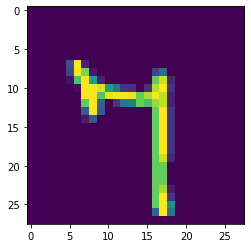

In [86]:
for data in trainset:
    x, y = data[0][0], data[1][0] #first image and label
    plt.imshow(x.view([28, 28]))
    print(y)
    break

## Part 3

In [40]:
import torch.nn as nn
import torch.nn.functional as F

In [94]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 10)
        
    def forward(self, x):
        x = x.view([-1, 784])
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x) 
        x = self.fc4(x)
        x = F.softmax(x, dim=1)
        return x

In [95]:
n = Net()
n.forward(x)

tensor([[0.0990, 0.1186, 0.1006, 0.0884, 0.1134, 0.0885, 0.1149, 0.0773, 0.0936,
         0.1057]], grad_fn=<SoftmaxBackward0>)

## Part 4

In [96]:
import torch.optim as optim

In [97]:
opt = optim.Adam(n.parameters(), lr=0.001)

In [98]:
epoch = 3

for e in range(epoch):
    for data in trainset:
        x, y = data
        n.zero_grad()
        out = n(x)
        loss = F.nll_loss(out, y)
        loss.backward()
        opt.step()
    print(loss)   

tensor(-0.9613, grad_fn=<NllLossBackward0>)
tensor(-0.9959, grad_fn=<NllLossBackward0>)
tensor(-0.9584, grad_fn=<NllLossBackward0>)


In [102]:
correct = 0
total = 0

with t.no_grad():
    for data in testset:
        x, y = data
        out = n(x)
        for idx, i in enumerate(out):
            if t.argmax(i) == y[idx]:
                correct += 1
            total += 1
print("Accuracy:", round(correct/total, 3))

Accuracy: 0.948


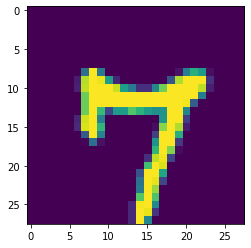

In [108]:
id = 5
plt.imshow(x[id].view(28, 28))
plt.show()

In [109]:
t.argmax(n(x[id]))

tensor(7)

# Data Loaders

In [11]:
import os
import sys
from torchvision import datasets, transforms

In [6]:
data_path = '/Users/shivaverma/Desktop/personal_projects/Jigsaw-Solver/data/puzzle_2x2/'

In [34]:
trans = transforms.Compose(
            [transforms.Resize((224,224)),
             transforms.ToTensor()])

In [43]:
dataset = datasets.ImageFolder(data_path, transform=trans)
dataloader = t.utils.data.DataLoader(dataset, batch_size=32)

In [36]:
batch = next(iter(dataloader))